# Python implementation of Logistic Regression from scratch

_Umberto Michelucci, um@udata.science_

### Abstract

In this notebook I develop a complete version of Logistic Regression from scratch, without using any library (except numpy). I apply the model to a subset of MNIST data containing only the digits 1 and 2 (see the data preparation part to see how to do it) to do binary classification. For the equations and the mathematics behind the python code you can refer (to this notebook)[http://localhost:8888/notebooks/Documents/Data%20Science/Projects/Logistic-Regression-Explained/Logistic%20Regression%20from%20scratch.ipynb#] where I did a complete derivation of the mathematics behind the model. The relevant equations are reported here to make it easier for the reader to follow the code.

## Libraries

In [1]:
import numpy as np
from sklearn.datasets import fetch_mldata

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

## Data preparation

To get MNIST data we use the function fetch_mldata, in the datasets package. Let's get all the dataset, and then we will select only the digits we want.

In [2]:
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [3]:
X,y = mnist["data"], mnist["target"]

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

To know how many digits we have we can run this simple code

In [43]:
total = 0
for i in range(10):
    print ("digit", i, "appear", np.count_nonzero(y == i), "times")

digit 0 appear 6903 times
digit 1 appear 7877 times
digit 2 appear 6990 times
digit 3 appear 7141 times
digit 4 appear 6824 times
digit 5 appear 6313 times
digit 6 appear 6876 times
digit 7 appear 7293 times
digit 8 appear 6825 times
digit 9 appear 6958 times


Note: datasets loaded by scikit-learn have a dictionary structure. 

- a DESCR structure describing the dataset
- a ```data``` key containing an array with one row per instance and one column per feature
- a ```target``` with an array with the labels

we have 70000 digits available, from 0 to 9. Let's define a helper function that will allow us to visualize the digits.

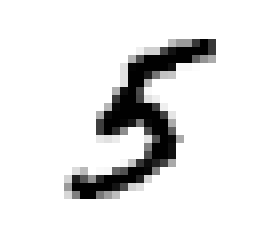

In [27]:
def plot_digit(some_digit):
    
    some_digit_image = some_digit.reshape(28,28)

    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
    plt.axis("off")
    plt.show()
    
plot_digit(X[36003])

Let's check the relative label...

In [28]:
y[36003]

5.0

### Train and test set preparation

Let's first reduce our dataset only to 1 and 2 digits.

In [32]:
X_12 = X[np.any([y == 1,y == 2], axis = 0)]
y_12 = y[np.any([y == 1,y == 2], axis = 0)]

Let's check a couple of digits

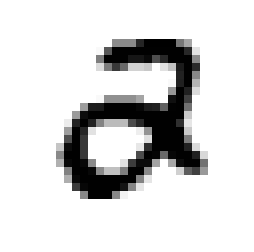

2.0


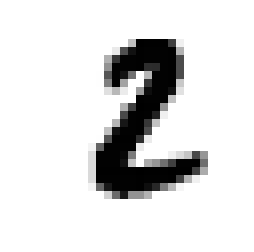

2.0


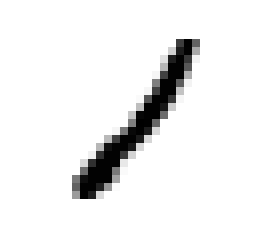

1.0


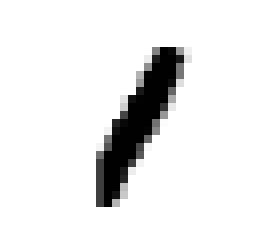

1.0


In [41]:
plot_digit(X_12[8000])
print(y_12[8000])

plot_digit(X_12[9345])
print(y_12[9345])

plot_digit(X_12[877])
print(y_12[877])

plot_digit(X_12[144])
print(y_12[144])

The size of our dataset is

In [42]:
print(X_12.shape)
print(y_12.shape)

(14867, 784)
(14867,)


In our reduced dataset how many 1 and 2 do we have?

In [46]:
print("number of 1:", np.count_nonzero(y_12 == 1))
print("number of 2:", np.count_nonzero(y_12 == 2))

number of 1: 7877
number of 2: 6990


In [132]:
shuffle_index = np.random.permutation(X.shape[0])
X, y = X[shuffle_index], y[shuffle_index]

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [133]:
y_train[:100]

array([ 6.,  8.,  3.,  4.,  2.,  6.,  9.,  0.,  2.,  0.,  7.,  3.,  2.,
        8.,  9.,  7.,  6.,  0.,  1.,  4.,  0.,  3.,  7.,  8.,  1.,  8.,
        7.,  6.,  4.,  5.,  2.,  6.,  7.,  5.,  3.,  6.,  8.,  6.,  6.,
        8.,  1.,  3.,  5.,  1.,  1.,  3.,  9.,  9.,  0.,  6.,  4.,  1.,
        7.,  7.,  1.,  6.,  5.,  2.,  7.,  3.,  8.,  7.,  8.,  5.,  7.,
        9.,  2.,  2.,  0.,  0.,  1.,  8.,  5.,  2.,  8.,  2.,  1.,  5.,
        9.,  3.,  9.,  1.,  6.,  1.,  9.,  3.,  6.,  8.,  9.,  2.,  4.,
        2.,  5.,  6.,  4.,  4.,  4.,  6.,  6.,  2.])

## Binary Classifier

Let's consider a problem where we just want to identify a 1 or a 2 (binary classification). So let's create our datasets

In [134]:
X_train1 = X_train[y_train == 1]/255.0
y_train1 = y_train[y_train == 1]
X_train2 = X_train[y_train == 2]/255.0
y_train2 = y_train[y_train == 2]


X_test1 = X_test[y_test == 1]/255.0
y_test1 = y_test[y_test == 1]
X_test2 = X_test[y_test == 2]/255.0
y_test2 = y_test[y_test == 2]

# Reshape


X_train1 = X_train1.transpose()
y_train1 = y_train1.reshape(1,y_train1.shape[0])
X_train2 = X_train2.transpose()
y_train2 = y_train2.reshape(1,y_train2.shape[0])

X_test1 = X_test1.transpose()
y_test1 = y_test1.reshape(1,y_test1.shape[0])
X_test2 = X_test2.transpose()
y_test2 = y_test2.reshape(1,y_test2.shape[0])

#print(X_train1.shape)
#print(X_train2.shape)

# End of reshape

X_train12 = np.concatenate((X_train1, X_train2), axis = 1)
y_train12 = np.concatenate((y_train1, y_train2), axis = 1)

X_test12 = np.concatenate((X_test1, X_test2), axis = 1)
y_test12 = np.concatenate((y_test1, y_test2), axis = 1)

shuffle_index = np.random.permutation(X_train12.shape[1])
X_train12, y_train12 = X_train12[:,shuffle_index], y_train12[:,shuffle_index]

shuffle_index = np.random.permutation(X_test12.shape[1])
X_test12, y_test12 = X_test12[:,shuffle_index], y_test12[:,shuffle_index]



print(X_train12.shape)
print(y_train12.shape)
print(X_test12.shape)
print(y_test12.shape)

dim_train = X_train12.shape[1]
dim_test = X_test12.shape[1]

print(dim_train)
print(dim_test)

(784, 12708)
(1, 12708)
(784, 2159)
(1, 2159)
12708
2159


We will need to rescale our lables. Remember we will compare them in the cost function with 0 and 1 (proabilities) and therefore our class labels must be 0 and 1, not 1 and 2. So the following step take care of it.

In [135]:
np.place(y_train12, y_train12 == 1, 0)
np.place(y_train12, y_train12 == 2, 1)

np.place(y_test12, y_test12 == 1, 0)
np.place(y_test12, y_test12 == 2, 1)

#y_train12 -= 1
#y_test12 -= 1

(784, 6756)
(784, 12708)


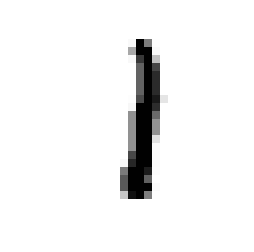

[ 0.]


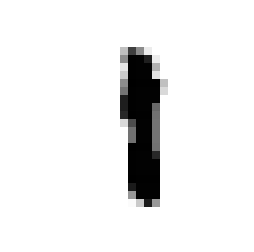

[ 0.]


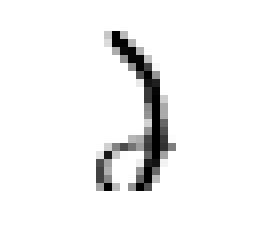

[ 1.]


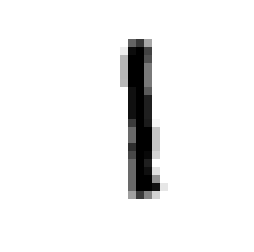

[ 0.]


In [136]:
print(X_train1.shape)
print(X_train12.shape)

plot_digit(X_train12[:,1005])
print(y_train12[:,1005])
plot_digit(X_train12[:,1432])
print(y_train12[:,1432])
plot_digit(X_train12[:,456])
print(y_train12[:,456])
plot_digit(X_train12[:,567])
print(y_train12[:,567])

## Helper functions

In [137]:
def sigmoid(z):
    s = 1.0 / (1.0 + np.exp(-z))
    
    return s

In [138]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [ 0.5         0.88079708]


In [139]:
def initialize(dim):
    w = np.zeros((dim,1))
    b = 0
    
    assert (w.shape == (dim,1))
    assert (isinstance(b, float) or isinstance(b,int))
    
    return w,b

In [140]:
w,b = initialize(2)
print(w)
print(b)

[[ 0.]
 [ 0.]]
0


For our input our $w$ will have dimensions (784,1)

In [141]:
def propagate(w, b, X, Y):
    
    
    m = X.shape[1]
    
    z = np.dot(w.T,X)+b
    
    #print("A big count ",np.count_nonzero(z > 1000))
    A = sigmoid(z)

    
    #print(X.shape, Y.shape, A.shape)

    
    cost = -1.0/m*np.sum(Y*np.log(A)+(1.0-Y)*np.log(1.0-A))
    
    
    dw = 1.0/m*np.dot(X, (A-Y).T)
    db = 1.0/m*np.sum(A-Y)
    
    
    #print ("z[5] is equal to ", z[:,5])
    #print ("A[5] is equal to ", A[:,5])
    #print ("w is equal to ", w)
    #print ("sum(w) is equal to ", np.sum(w))
    
    #print("dw == 0 ",np.count_nonzero(dw == 0))
    
    assert (dw.shape == w.shape)
    assert (db.dtype == float)
    
    cost = np.squeeze(cost)
    assert (cost.shape == ())
    
    grads = {"dw": dw, 
             "db":db}
    
    return grads, cost

In [142]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        #print(w)
        
        if i % 100 == 0:
            costs.append(cost)
            
        if print_cost and i % 100 == 0:
            print ("Cost (iteration %i) = %f" %(i, cost))
            
    grads = {"dw": dw, "db": db}
    params = {"w": w, "b": b}
        
    return params, grads, costs

In [143]:
def predict (w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    
    A = sigmoid (np.dot(w.T, X)+b)
    
    for i in range(A.shape[1]):
        if (A[:,i] > 0.5): 
            Y_prediction[:, i] = 1
        elif (A[:,i] <= 0.5):
            Y_prediction[:, i] = 0
            
    assert (Y_prediction.shape == (1,m))
    
    return Y_prediction
        

## Model

In [144]:
def model (X_train, Y_train, X_test, Y_test, num_iterations = 1000, learning_rate = 0.5, print_cost = False):
    
    #print("Dimension for init ", X_train.shape[0])
    w, b = initialize(X_train.shape[0])
    
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict (w, b, X_test)
    Y_prediction_train = predict (w, b, X_train)
    
    train_accuracy = 100.0 - np.mean(np.abs(Y_prediction_train-Y_train)*100.0)
    test_accuracy = 100.0 -np.mean(np.abs(Y_prediction_test-Y_test)*100.0)
    
    d = {"costs": costs,
        "Y_prediction_test": Y_prediction_test,
        "Y_prediction_train": Y_prediction_train,
         "w": w,
         "b": b,
         "learning_rate": learning_rate,
         "num_iterations": num_iterations}
    
    print ("Accuarcy Test: ",  test_accuracy)
    print ("Accuracy Train: ", train_accuracy)
    
    return d

In [126]:
print(X_train12.shape)

(784, 12795)


In [145]:
d = model (X_train12, y_train12, X_test12, y_test12, num_iterations = 4000, learning_rate = 0.05, print_cost = True)

Cost (iteration 0) = 0.693147
Cost (iteration 100) = 0.108168
Cost (iteration 200) = 0.078617
Cost (iteration 300) = 0.066479
Cost (iteration 400) = 0.059552
Cost (iteration 500) = 0.054944
Cost (iteration 600) = 0.051594
Cost (iteration 700) = 0.049012
Cost (iteration 800) = 0.046939
Cost (iteration 900) = 0.045226
Cost (iteration 1000) = 0.043776
Cost (iteration 1100) = 0.042528
Cost (iteration 1200) = 0.041437
Cost (iteration 1300) = 0.040473
Cost (iteration 1400) = 0.039612
Cost (iteration 1500) = 0.038837
Cost (iteration 1600) = 0.038134
Cost (iteration 1700) = 0.037493
Cost (iteration 1800) = 0.036905
Cost (iteration 1900) = 0.036363
Cost (iteration 2000) = 0.035861
Cost (iteration 2100) = 0.035394
Cost (iteration 2200) = 0.034959
Cost (iteration 2300) = 0.034552
Cost (iteration 2400) = 0.034170
Cost (iteration 2500) = 0.033810
Cost (iteration 2600) = 0.033471
Cost (iteration 2700) = 0.033151
Cost (iteration 2800) = 0.032847
Cost (iteration 2900) = 0.032559
Cost (iteration 3000) 

## Cost function vs. number of iterations

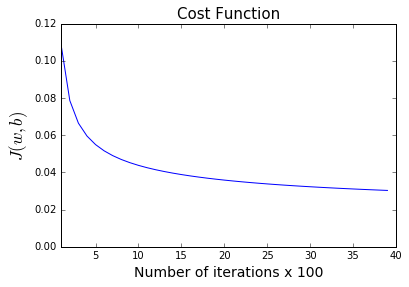

In [173]:
plt.plot(d["costs"])
plt.xlim([1,40])
plt.ylim([0,0.12])
plt.title("Cost Function",fontsize = 15)
plt.xlabel("Number of iterations x 100", fontsize = 14)
plt.ylabel("$J(w,b)$", fontsize = 17)
plt.show()

## Logistic Regression with sklearn

In [97]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

In [102]:
XX = X_train12.T
YY = y_train12.T.ravel()

print(XX.shape)
print(YY.shape)

logistic.fit(XX,YY)

(12795, 784)
(12795,)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [106]:
print("Predicted %s, real class %s" %(logistic.predict(XX), YY))

Predicted [ 1.  1.  1. ...,  2.  2.  1.], real class [ 1.  1.  1. ...,  2.  2.  1.]


In [107]:
logistic.score(XX,YY)

0.99609222352481441

In [108]:
XXT = X_test12.T
YYT = y_test12.T.ravel()

logistic.score(XXT,YYT)

0.9932432432432432